## Introduction

hai kagglers, today i'm going to make a predictions on Mobile phone pricing dataset using random forest, XGboost and SVM algorithm, let's see which one perform the best.

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Quick look

In this dataset, we got two csv files, train data and test data. both had 21 column each.

In [46]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

Our target column is price range from train data. this column has 4 unique value, 0 for low cost mobile phone, 1 for medium cost mobile phone. 2 for high cost and 3 for very high cost. Since the data disributed evenly, we are going to use it as it is,

In [6]:
# 0 for low cost
# 1 for medium cost
# 2 for high cost
# 3 for very high cost

train.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5c4e0ab10>,
      dtype=object)

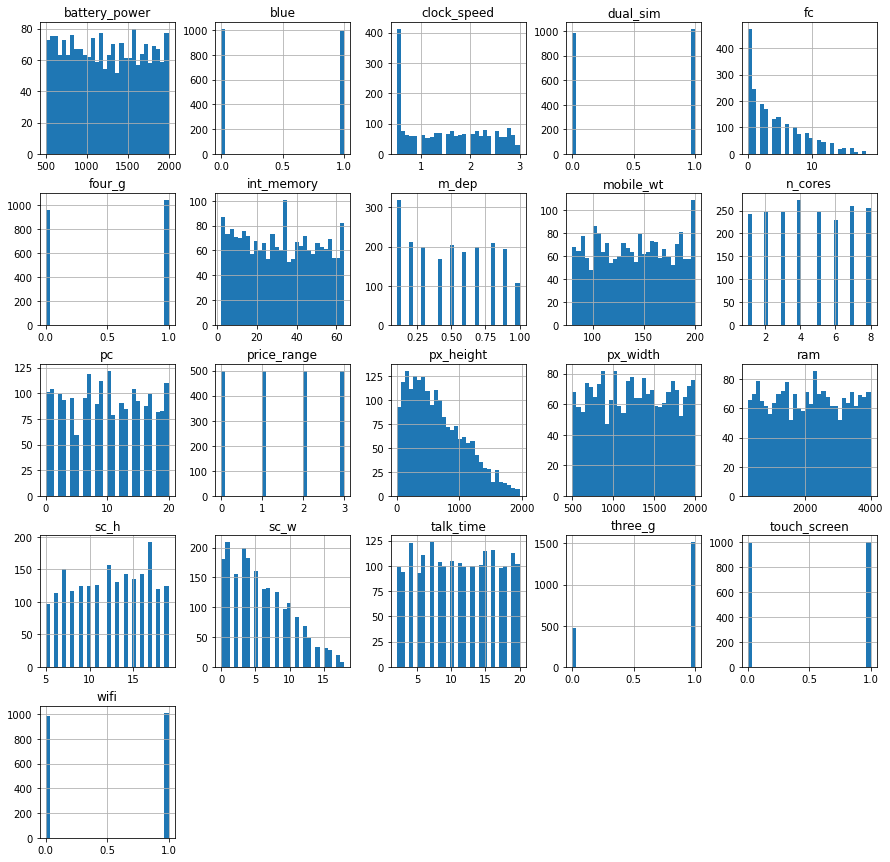

In [22]:
## EDA
# Distribution

train.hist(bins=30, figsize=(15, 15))

Here we have a distribution plot for every columns, a few column is evenly distributed like dual sim, bluetooth, price range, wifi, and touch screen. The others distributed randomly.

In [47]:
# Most important feature

Corr = train.corr()

IF = Corr['price_range'].sort_values(ascending=False).head(10).to_frame()
IF.head(5)

price_range
price_range       1.000000
ram               0.917046
battery_power     0.200723
px_width          0.165818
px_height         0.148858

Text(0.5, 1.0, 'Corr with px height')

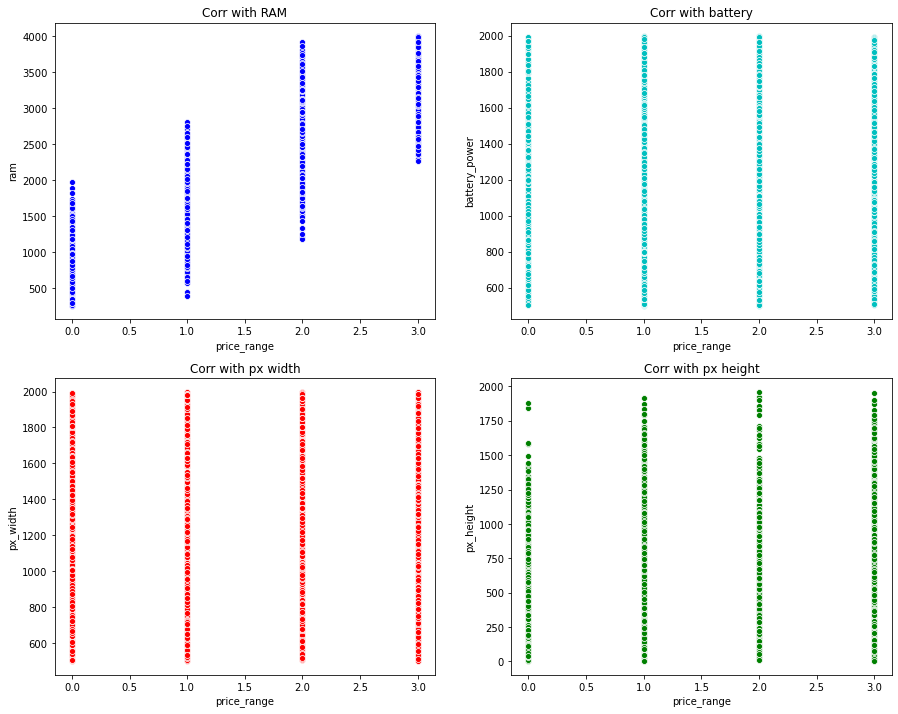

In [9]:
f = plt.figure(figsize=(15,12))

# corr with ram
ax = f.add_subplot(221)
ax = sns.scatterplot(x="price_range", y="ram", color='b', data=train)
ax.set_title('Corr with RAM')

# corr with Battery
ax = f.add_subplot(222)
ax = sns.scatterplot(x="price_range", y="battery_power", color='c', data=train)
ax.set_title('Corr with battery')

# corr with px_width
ax = f.add_subplot(223)
ax = sns.scatterplot(x="price_range", y="px_width", color='r', data=train)
ax.set_title('Corr with px width')

# corr with height
ax = f.add_subplot(224)
ax = sns.scatterplot(x="price_range", y="px_height", color='g', data=train)
ax.set_title('Corr with px height')

The most important feature is ram, battery power, width and height. Ram is strongly correlated with price range. Herewe can conclude that the main factor of the price is the ram itself. The other are not to strong and seem almost distributed evenly.

## Modeling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [48]:
# Split Data

X = train.drop('price_range', axis=1)
y = train['price_range']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [13]:
print('X_train : ' + str(X_train.shape))
print('X_test : ' + str(X_test.shape))
print('y_train : ' + str(y_train.shape))
print('y_test : ' + str(y_test.shape))

X_train : (1400, 20)
X_test : (600, 20)
y_train : (1400,)
y_test : (600,)


### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 12)
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8733333333333333


### XGBoost

In [20]:
import xgboost as xgb

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='multi:softmax', num_class=3, n_estimators=150, seed=123)
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.923333


### SVM

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()

parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
model = GridSearchCV(svm, param_grid=parameters)
model.fit(X_train, y_train)

# Best parameters
print("Best CV params", model.best_params_)

# accuracy
print("Test accuracy :", model.score(X_test, y_test))

Best CV params {'C': 1, 'gamma': 1e-05}
Test accuracy : 0.9583333333333334


Here we found that SVM perfrom the better than the other algorithm. We are going to use this model to predict the data on train and test data.

In [26]:
## Assign the value

predicted_value = model.predict(X_test)
actual_value = y

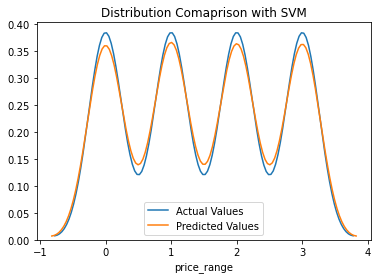

In [45]:
## COmparison distribution in Train data

sns.distplot(actual_value, hist=False, label="Actual Values")
sns.distplot(predicted_value, hist=False, label="Predicted Values")
plt.title('Distribution Comaprison with SVM')
plt.show()

## Predict

Let's predict the price range in test data

In [32]:
test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [36]:
X2 = test.drop('id', axis=1)

In [44]:
## Perform predictions

predicted_test_value = model.predict(X2)
pd.value_counts(predicted_test_value)

3    265
0    253
2    250
1    232
dtype: int64

Here we have value count on every unique value on predicted test price range. This is almost evenly distributed, but the phone with a very high cost is dominating over the others with 26.5 %. and the lowest is medium cost with 23.2 %.

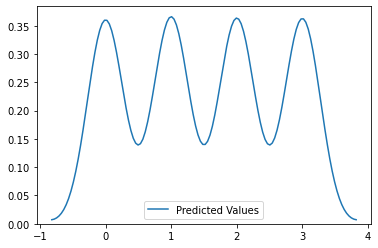

In [49]:
# Here is how distribution look like in test data price range

sns.distplot(predicted_value, hist=False, label="Predicted Values")
plt.show()

## End

That is all for this kernel today, hope you like it.
Thank you.
Have a good day.